In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)
data = pd.read_csv('exams.csv')
data.columns = [c.replace(' ','_') for c in data.columns]
originalFeatures = data.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)
print(data.head())

originalFeatures count 8
originalFeatures Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')
   gender race/ethnicity parental_level_of_education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  


In [2]:
"""
I will select parental_level_of_education as our discrete attribute
Firstly, I need to rename redundant attributes
"""
dataParent = data['parental_level_of_education'].replace('some high school', 'high school')
df = data.loc[data['parental_level_of_education']=='some high school','parental_level_of_education']='high school'
df = pd.DataFrame(data)
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
pd.DataFrame({'parental level of education':data.parental_level_of_education})

,parental level of education
0,high school
1,high school
2,some college
3,high school
4,associate's degree
...,...
995,high school
996,associate's degree
997,high school
998,some college


In [4]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [5]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#feature_arry = ohe.fit_transform(df[["gender","race/ethnicity","parental_level_of_education","lunch","test_preparation_course"]]).toarray()
#ohe.categories_
#feature_labels = ohe.categories_
#np.hstack(feature_labels)
#feature_labels = np.hstack(feature_labels)
#new_df = pd.DataFrame(feature_arry, columns = feature_labels)
#feature_labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["race/ethnicity"] = le.fit_transform(data["race/ethnicity"])
#data["parental_level_of_education"] = le.fit_transform(data["parental_level_of_education"])
data["lunch"] = le.fit_transform(data["lunch"])
#data["test_preparation_course"] = le.fit_transform(data["test_preparation_course"])
df = pd.DataFrame(data)
df


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,0,high school,1,completed,67,67,63
1,0,3,high school,0,none,40,59,55
2,1,4,some college,0,none,59,60,50
3,1,1,high school,1,none,77,78,68
4,1,4,associate's degree,1,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,high school,1,none,73,70,65
996,1,3,associate's degree,0,completed,85,91,92
997,0,2,high school,0,none,32,35,41
998,0,2,some college,1,none,73,74,82


In [6]:
'''
1. Applying Decision Tree Classification
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X = df[["math_score","writing_score"]].values
y = df['test_preparation_course'].values
print(cl('X variable samples : {}'.format(X[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y[:5]), attrs = ['bold']))

X variable samples : [[67 63]
 [40 55]
 [59 50]
 [77 68]
 [78 68]]
Y variable samples : ['completed' 'none' 'none' 'none' 'completed']


In [8]:
'''
Splitting data
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'black'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'black'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'black'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'black'))

X_train shape : (700, 2)
X_test shape : (300, 2)
y_train shape : (700,)
y_test shape : (300,)


In [9]:
#clf = DecisionTreeClassifier() # Creating decision tree classifier obj
#clf = clf.fit(X_train, y_train) # Training decision tree classifier
#y_pred = clf.predict(X_test) #Predict the response for test dataset
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)

In [10]:
print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 73%


Index(['math_score', 'writing_score'], dtype='object')

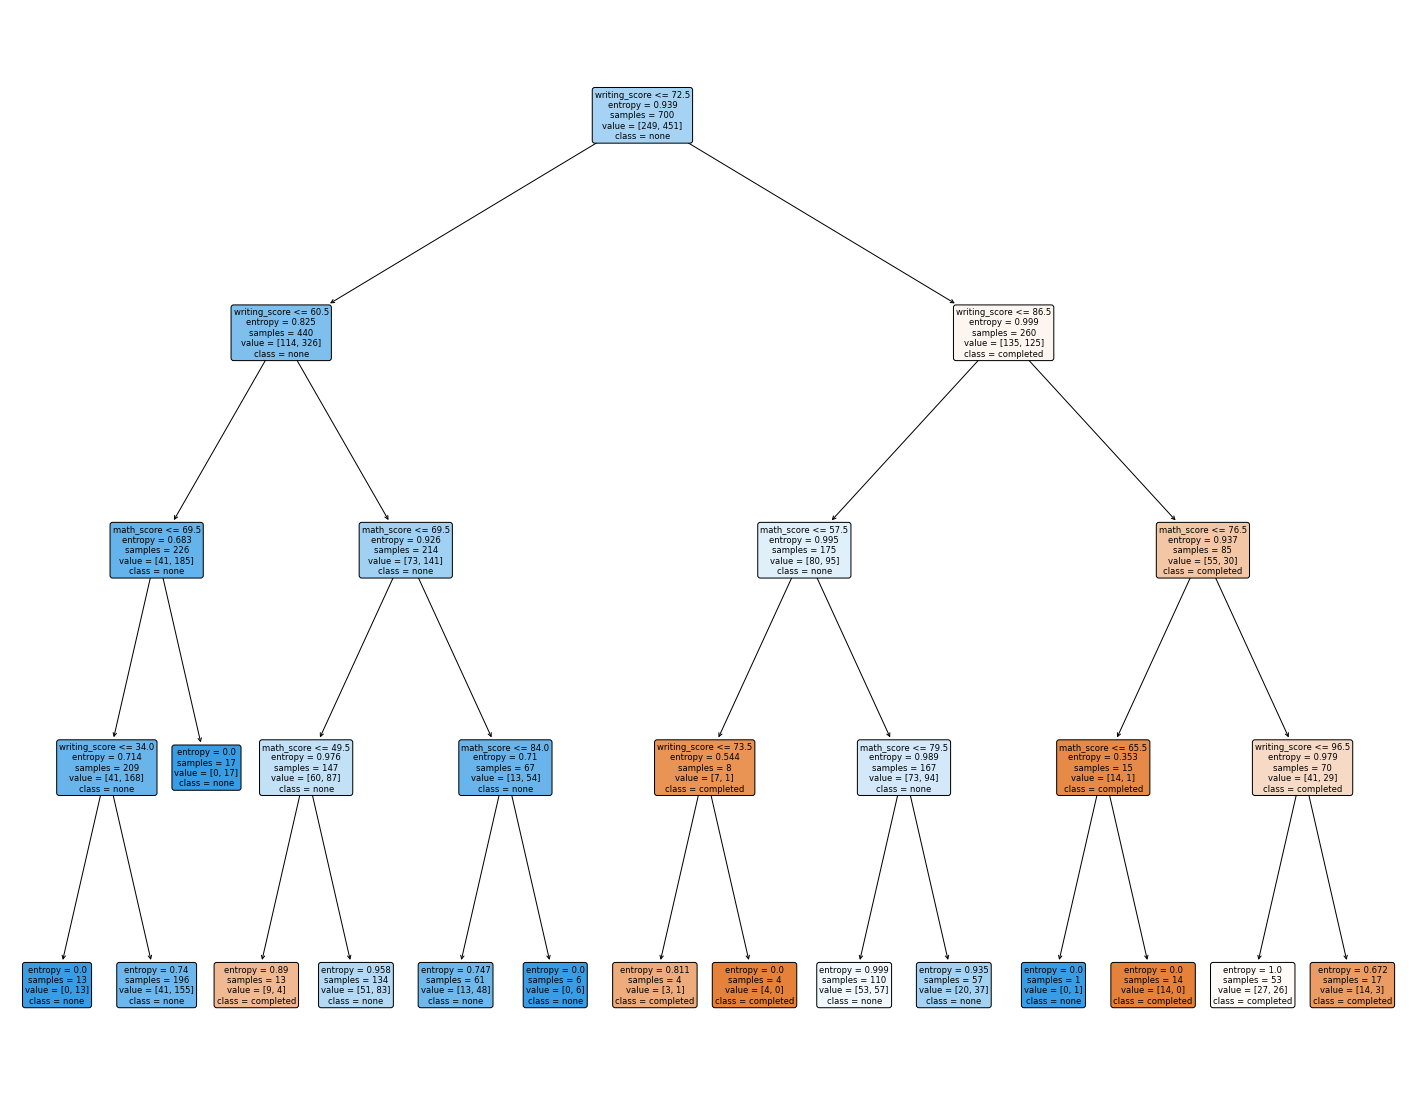

In [11]:
arr = [5,7]
feature_names = df.columns[arr]
target_names = df["test_preparation_course"].unique().tolist()
plot_tree(model, feature_names = feature_names,
         class_names = target_names,
         filled = True,
         rounded = True)
plt.savefig('tree.png')
feature_names

In [12]:
'''
kNN algorithm
'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test)) #predict on dataset which model has not seen before
print(knn.score(X_test, y_test)) #calculate the accuracy of the model

['completed' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none'
 'completed' 'none' 'none' 'none' 'none' 'none' 'none' 'completed'
 'completed' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'completed'
 'none' 'none' 'completed' 'none' 'none' 'completed' 'completed'
 'completed' 'completed' 'completed' 'none' 'none' 'none' 'none' 'none'
 'completed' 'none' 'none' 'completed' 'none' 'none' 'none' 'none' 'none'
 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none'
 'completed' 'none' 'completed' 'none' 'none' 'none' 'none' 'none' 'none'
 'none' 'none' 'none' 'completed' 'none' 'none' 'none' 'none' 'none'
 'none' 'none' 'completed' 'none' 'none' 'none' 'none' 'none' 'completed'
 'none' 'completed' 'none' 'none' 'completed' 'none' 'none' 'none'
 'completed' 'none' 'none' 'none' 'none' 'none' 'none' 'completed' 'none'
 'completed' 'none' 'none' 'none' 'none' 'none' 'completed' 'completed'
 'none' 'completed' 'none' 'completed' 'none' 'completed' 'none' 'none'
 'none

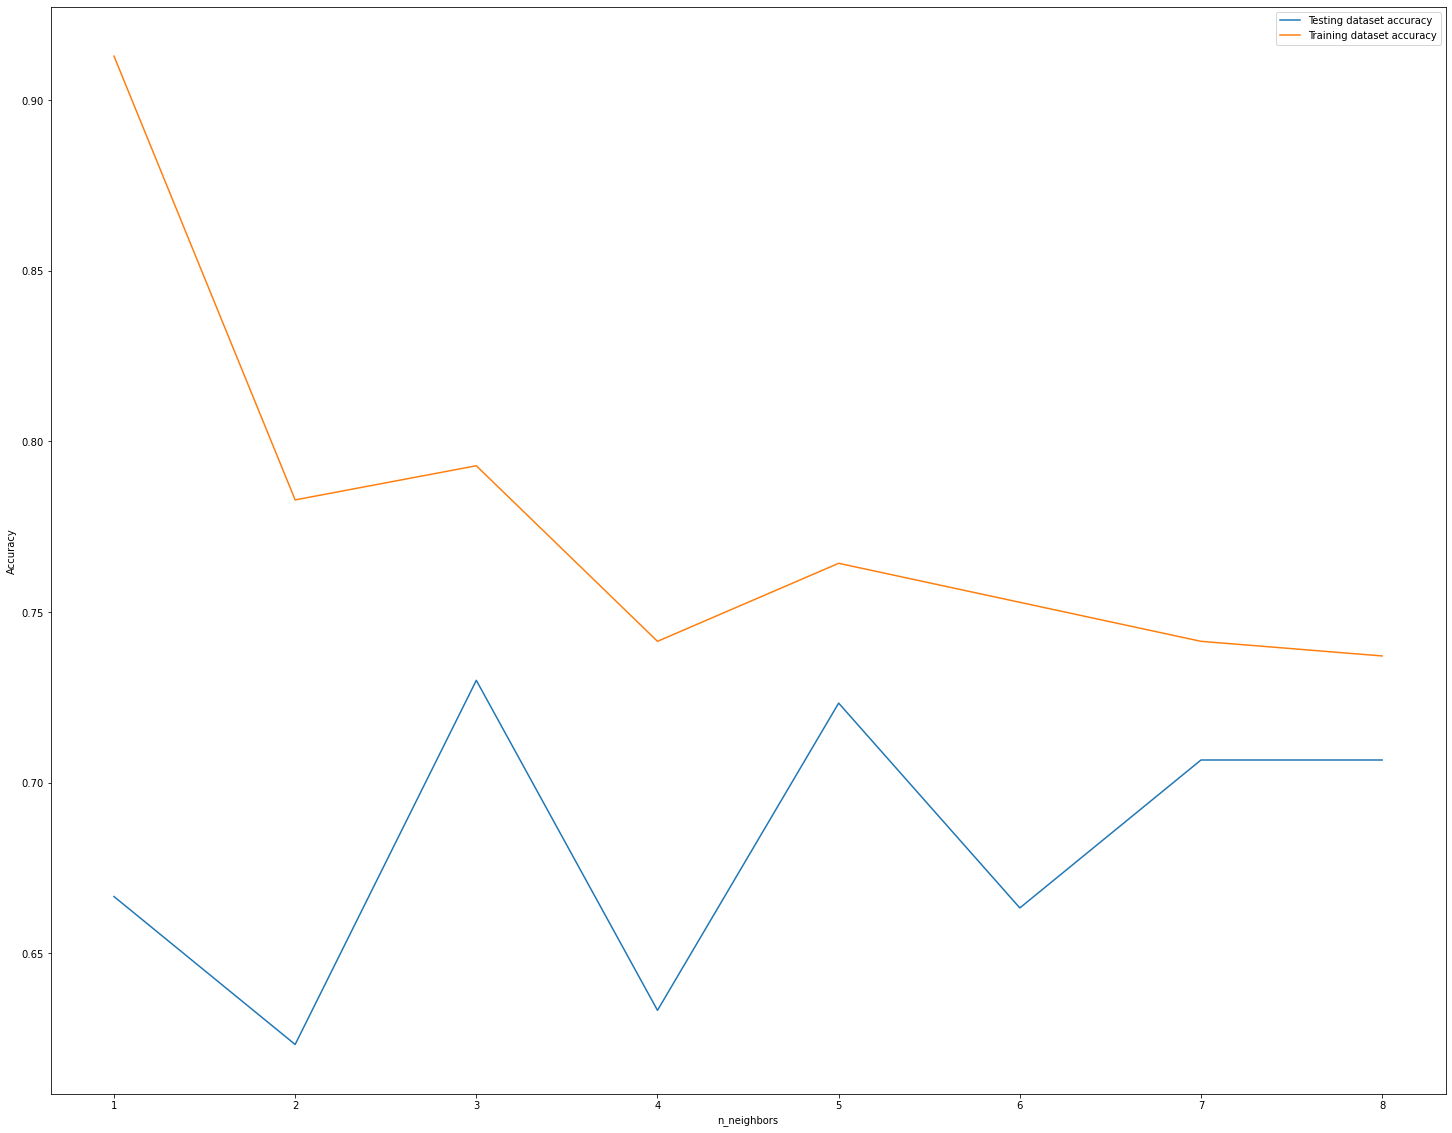

In [13]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
#Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:

'''
Gaussian Naive Bayes
'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 300 points : 92
